# Trajectory-Based Continuous Collision Detection (T-CCD) For 2D Particle Systems

This notebook derives the collision time and elastic collision response for particle simulation in **2D space**, moving with constant velocities. The idea here is to develop a mathematical model for the development of T-CCD.

Initial Idea:
- Use the **Point Of Intersection (POI)** to determine if the trajectory of 2 particles has the potential to collide.

Suggested Idea by Sir. Roland:
- Use Newton's second law of motion $(\vec{F} = m\vec{a})$.

Apply this ideas to Continuous Collision Detection (CCD).

## Initial Idea

- Let $\vec{p}_1$ and $\vec{p}_2$ be the initial positions of the 2 particles.
- Let $\vec{v}_1$ and $\vec{v}_2$ be their velocities.

The parametric motion,

$$
\begin{align}
\vec{p}_{n + 1} & = \vec{p}_n + \vec{v}_n t \\
\vec{r}(t) & = \vec{p}_n + \vec{v}_n t
\end{align}
$$

The intersection occurs when,

$$
\begin{align}
\vec{r}_1(t) & = \vec{r_2}(t) \\
\vec{p}_1 + \vec{v}_1t & = \vec{p}_2 + \vec{v}_2t
\end{align}
$$

Rearrange the equation into a linear form,

$$
(\vec{v}_1 - \vec{v}_2)t = \vec{p}_2 - \vec{p}_1 = \Delta \vec{v}
$$

This forms the system,

$$
\Delta \vec{v} = \begin{cases}
(v_{1x} - v_{2x})t & = \Delta \vec{v}_x \\
(v_{1y} - v_{2y})t & = \Delta \vec{v}_y
\end{cases}
$$

Definition of determinant,

$$
\begin{align}
\det(a, b) & = \vec{a} \times \vec{b} & (\text{Equivalent to } |\vec{a} \times \vec{b}| \text{ in 2D}) \\
& = a_x b_y - a_y b_x
\end{align}
$$

If the determinant of $\det(\vec{v}_2, \vec{v}_1) \neq 0$ then, define

$$
\Delta \vec{p} = \vec{p}_2 - \vec{p}_1
$$

we can find the time it takes for the first particle to reach the intersection,

$$
\begin{align}
t_1 & = \frac{\det(\vec{v}_2, \Delta \vec{p})}{\det(\vec{v}_2, \vec{v}_1)} \\
& = \frac{v_{2x} \Delta \vec{p}_y - v_{2y} \Delta \vec{p}_x}{v_{2x} v_{1y} - v_{2y} v_{1x}}
\end{align}
$$

Similarly, we can also find the time it takes for the second particle to reach the intersection,

$$
\begin{align}
t_2 & = \frac{\det(\vec{v}_1, \Delta \vec{p})}{\det(\vec{v}_2, \vec{v}_1)} \\
& = \frac{v_{1x} \Delta \vec{p}_y - v_{1y} \Delta \vec{p}_x}{v_{2x} v_{1y} - v_{2y} v_{1x}}
\end{align}
$$

Doing so, we should have the following result,

$$
t = t_1 = t_2
$$

With this, we can find the point of intersection,

$$
POI = r_1(t) = r_2(t)
$$

When $\det(\vec{v}_2, \vec{v}_1) = 0$, then the objects are either **parallel** or **co-linear**, meaning no interrsection will occur.

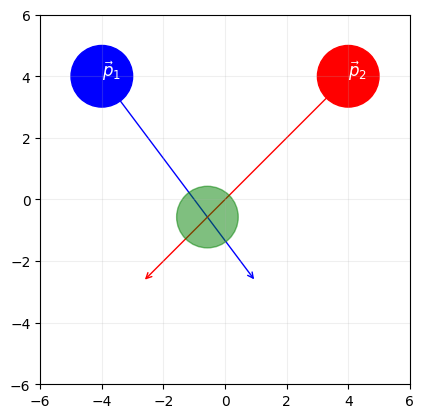

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Using `np.cross` does work but it is depricated for 2D array, thus this function exists.
def cross2d(a: np.ndarray[any], b: np.ndarray[any]) -> float:
    return a[0] * b[1] - a[1] * b[0]

# Particle size
radii = 1

# First frame out of 60 frames
tf = 1 / 60

# Initial position of Particle 1
p1 = np.array((-4.0, 4.0))
v1 = np.array((300.0, -400.0))

# Initial position of particle 2
p2 = np.array((4.0, 4.0))
v2 = np.array((-400.0, -400.0))

# Radius velocity of particle 1
r1 = p1 + v1 * tf

# Radius velocity of particle 2
r2 = p2 + v2 * tf

# Find the intersection using determinant
det = cross2d(v2, v1)

if (det != 0.0):
    dp = p2 - p1

    t = cross2d(v2, dp) / det

    poi = p1 + v1 * t

    plt.gca().add_patch(plt.Circle(poi, radii, color="green", alpha=0.5))

plt.gca().add_patch(plt.Circle(p1, radii, color="blue"))
plt.annotate(r"$\vec{p}_1$", p1, color="white", fontsize=12)

plt.gca().add_patch(plt.Circle(p2, radii, color="red"))
plt.annotate(r"$\vec{p}_2$", p2, color="white", fontsize=12)

plt.annotate("", xy=p1, xytext=r1, arrowprops=dict(arrowstyle="<-", color="blue", lw=1), zorder=0)
plt.annotate("", xy=p2, xytext=r2, arrowprops=dict(arrowstyle="<-", color="red", lw=1), zorder=0)

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.gca().set_aspect("equal")

plt.grid(alpha=0.2)
plt.show()

Limitation to this idea:

- Unable to find the exact point/time where the 2 particles will collide.

A suggestion we found [online](https://math.stackexchange.com/questions/4815976/how-do-i-find-the-first-point-of-collision-of-2-circles-moving-in-a-2d-space), recommended using the **Pythagorean theorem**. This makes sense because it involves calculating the distance between two points using their **Cartesian coordinates**.

## Using Pythagorean Theorem

The initial approach using parametric motion helped find the potential point of intersection. However, it does not consider the actual size of the particles.

- Let $\vec{p}_1$ and $\vec{p}_2$ be the initial positions of the 2 particles.
- Let $\vec{v}_1$ and $\vec{v}_2$ be their velocities.
- Let $r_1$ and $r_2$ be their radius.

Using the distance formula, we can calculate the distance between the two objects at any given time $t$,

$$
d(t) = \sqrt{(x_2t - x_1t)^2 + (y_2t - y_1t)^2}
$$

A collision occurs when the sum of the radii of the two particles is equal to or greater than their distance,

$$
\begin{align}
d(t) & \leq r_1 + r_2 \\
\end{align}
$$

Using the formula we solve for $t$, we first define our variables,

$$
\begin{align}
\Delta \vec{p} & = \vec{p}_2 - \vec{p}_1 \\
\Delta \vec{v} & = \vec{v}_2 - \vec{v}_1
\end{align}
$$

Substitute into the expanded form resulting in a standard quadratic equation,

$$
at^2 + bt + c = 0
$$

where,

$$
\begin{align}
a & = \Delta \vec{v}_x^2 + \Delta \vec{v}_y^2 \\
b & = 2(\Delta \vec{p}_x \Delta \vec{v}_x + \Delta \vec{p}_y \Delta \vec{v}_y) \\
c & = \Delta \vec{p}_x^2 + \Delta \vec{p}_y^2 - (r_1 + r_2)^2
\end{align}
$$

The quadratic formula provides the time at which the collision occurs,

$$
t = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

The earliest positive time of $t_{min}$ represents the time of the first collision. If the discriminant $(b^2 - 4ac) < 0$, then there is no collision. Link to [desmos](https://www.desmos.com/calculator/fap78jkujh) to verify.

If $t_{min} > t \in [0, \Delta t]$ then no collision happens on the given time frame.

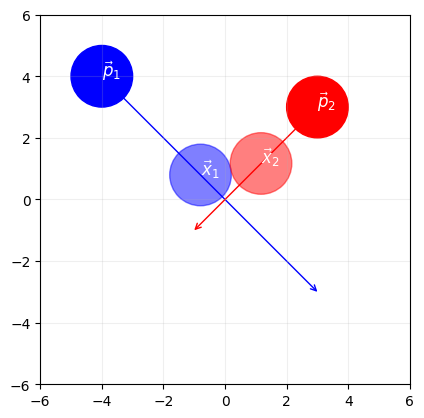

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Particle size
radii = 1

# Seconds
tf = 1

# Initial position of particle 1
p1 = np.array((-4.0, 4.0))
v1 = np.array((7, -7))

# Initial position of particle 2
p2 = np.array((3.0, 3.0))
v2 = np.array((-4.0, -4.0))

# Radius velocity of particle 1
r1 = p1 + v1 * tf

# Radius velocity of particle 2
r2 = p2 + v2 * tf

# Delta position
dp = p2 - p1
# Delta velocity
dv = v2 - v1

a = dv[0] ** 2 + dv[1] ** 2
b = 2 * (dp[0] * dv[0] + dp[1] * dv[1])
c = dp[0] ** 2 + dp[1] ** 2 - (radii + radii) ** 2

if b**2 - 4 * a * c >= 0:
    t = min(
        (-b + np.sqrt(b**2 - 4 * a * c)) / (2 * a),
        (-b - np.sqrt(b**2 - 4 * a * c)) / (2 * a),
    )

    # Point of collision for particle 1
    x1 = p1 + v1 * t
    # point of collision for particle 2
    x2 = p2 + v2 * t

    plt.gca().add_patch(plt.Circle(x1, radii, color="blue", alpha=0.5))
    plt.annotate(r"$\vec{x}_1$", x1, color="white", fontsize=12)

    plt.gca().add_patch(plt.Circle(x2, radii, color="red", alpha=0.5))
    plt.annotate(r"$\vec{x}_2$", x2, color="white", fontsize=12)

plt.gca().add_patch(plt.Circle(p1, radii, color="blue"))
plt.annotate(r"$\vec{p}_1$", p1, color="white", fontsize=12)

plt.gca().add_patch(plt.Circle(p2, radii, color="red"))
plt.annotate(r"$\vec{p}_2$", p2, color="white", fontsize=12)

plt.annotate(
    "",
    xytext=p1,
    xy=r1,
    arrowprops=dict(arrowstyle="->", color="blue", lw=1, shrinkB=0),
    zorder=0,
)
plt.annotate(
    "",
    xytext=p2,
    xy=r2,
    arrowprops=dict(arrowstyle="->", color="red", lw=1, shrinkB=0),
    zorder=0,
)

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.gca().set_aspect("equal")

plt.grid(alpha=0.2)
plt.show()


Now that we have the point of collision for the 2 particles, we apply the formula for elastic collision, First, let's define the masses of the particles.

- Let $m_1$ and $m_2$ be the mass of the 2 particles.

Conservation of momentum equation,

$$
\begin{align}
m_1 v_1 + m_2 v_2 & = m_1 v_1' + m_2 v_2' \\
\implies m_1(v_1 - v_1') & = m_2(v_2 - v_2')
\end{align}
$$

Conservation of kinetic energy equation,

$$
\begin{align}
\frac{1}{2} (m_1 v_1^2 + m_2 v_2^2) & = \frac{1}{2} (m_1 v_1'^2 + m_2 v_2'^2) \\
\implies m_1(v_1^2 - v_1'^2) & = m_2(v_2^2 - v_2'^2)
\end{align}
$$

By dividing the two equations, we get,

$$
\begin{align}
\frac{m_1(v_1^2 - v_1'^2)}{m_1(v_1 - v_1')} & = \frac{m_2(v_2^2 - v_2'^2)}{m_2(v_2 - v_2')} \\
\implies v_1 + v_1' & = v_2 + v_2' \\
\implies v_1 - v_2 & = v_1' - v_2'
\end{align}
$$

To solve for $v_1'$ and $v_2'$ which are the final velocities of the two particles we have the following formula,

$$
\begin{align}
v_1' & = \frac{m_1 - m_2}{m_1 + m_2} v_1 + \frac{2m_2}{m_1 + m_2} v_2 \\
v_2' & = \frac{m_2 - m_1}{m_1 + m_2} v_2 + \frac{2m_1}{m_1 + m_2} v_1
\end{align}
$$

This formula is specifically for one-dimensional elastic collisions. While it is not the primary focus of this notebook, a similar approach can be applied to two-dimensional elastic collisions. To solve for $\vec{v}_1'$ and $\vec{v}_2'$, we have to first find the normal vector ($\hat{n}$) and the normal tangent ($\hat{n}$) of the center of mass of the collision ($\vec{x}$), which is already solved using the pythagoras theorem.

$$
\begin{align}
\hat{n} & = \frac{\vec{x}_2 - \vec{x}_1}{||\vec{x}_2 - \vec{x}_1||} \\
\hat{t} & = \begin{bmatrix} -\hat{n}_y \\ \hat{n}_x \end{bmatrix}
\end{align}
$$

Decompose the velocities into normal and tangent components,

$$
\begin{align}
v_{1n} = \vec{v}_1 \cdot \hat{n}, & \vec{v}_1t = \vec{v}_1 \cdot \hat{t} \\
v_{2n} = \vec{v}_2 \cdot \hat{n}, & \vec{v}_2t = \vec{v}_2 \cdot \hat{t}
\end{align}
$$

Using the formula for conservation of momentum, we apply the normal directions,

$$
\begin{align}
v_{1n}' & = \frac{m_1 - m_2}{m_1 + m_2} v_{1n} + \frac{2m_2}{m_1 + m_2} v_{2n} \\
v_{2n}' & = \frac{m_2 - m_1}{m_1 + m_2} v_{2n} + \frac{2_m1}{m_1 + m_2} v_{1n}
\end{align}
$$

The tangent components remain unchanged because there is no force acting along the tangential direction during the collision,

$$
v_{1t}' = v_{1t}, \quad v_{2t}' = v_{2t}
$$

Finally, to find the final velocities apply the components of $\hat{n}$ and $\hat{t}$ relative to their velocities,

$$
\begin{align}
\vec{v}_1' & = v_{1n}' \hat{n} + v_{1t}' \hat{t} \\
\vec{v}_2' & = v_{2n}' \hat{n} + v_{2t}' \hat{t}
\end{align}
$$

Subtracting $\vec{v}_1'$ from $\vec{v}_2'$ we get,

$$
\begin{align}
\vec{v}_1' - \vec{v}_2' & = \left( \left( \frac{m_1 - m_2}{m_1 + m_2} v_{1n} + \frac{2m_2}{m_1 + m_2} \hat{t} \right) \hat{n} + v_{1t} \right) - (v_{1n} \hat{n} + v_{1t} \hat{t}) \\
& = \left( \frac{m_1 - m_2}{m_1 + m_2} v_{1n} + \frac{2m_2}{m_1 + m_2} v_{2n} - v_{1n} \right) \hat{n} \\
& = \left( \frac{-2m_2}{m_1 + m_2} v_{1n} + \frac{2m_2}{m_1 + m_2} v_{2n} \right) \hat{n} \\
& = \frac{2m_2}{m_1 + m_2} (v_{2n} - v_{1n}) \hat{n}
\end{align}
$$

Using this, we can substitute $v_{1n} = \vec{v}_1 \cdot \hat{n}$ and $v_{2n} = \vec{v}_2 \cdot \hat{n}$,

$$
\vec{v}_1' = \vec{v}_1 + \frac{2m_2}{m_1 + m_2} ((\vec{v}_2 - \vec{v}_1) \cdot \hat{n}) \hat{n}
$$

Substitute all values, we get,

$$
\begin{align}
\vec{v}_1' & = \vec{v}_1 + \frac{2m_2}{m_1 + m_2} \left( \frac{(\vec{v}_2 - \vec{v}_1) \cdot (\vec{x}_2 - \vec{x}_1)}{||\vec{x}_2 - \vec{x}_1||^2} \right) (\vec{x}_2 - \vec{x}_1) \\
\vec{v}_2' & = \vec{v}_2 + \frac{2m_1}{m_1 + m_2} \left( \frac{(\vec{v}_1 - \vec{v}_2) \cdot (\vec{x}_1 - \vec{x}_2)}{||\vec{x}_2 - \vec{x}_1||^2} \right) (\vec{x}_1 - \vec{x}_2)
\end{align}
$$

where,

$$
\begin{align}
\vec{x}_1 & = \vec{p}_1 + \vec{v}_1 t_{min} \\
\vec{x}_2 & = \vec{p}_2 + \vec{v}_2 t_{min} 
\end{align}
$$

Alternatively, use impluse formulation,

$$
\vec{J} = \frac{2m_1m_2}{m_1 + m_2} \left( \frac{(\vec{v}_2 - \vec{v}_1) \cdot (\vec{x}_2 - \vec{x}_1)}{||\vec{x}_2 - \vec{x}_1||^2} \right) (\vec{x}_2 - \vec{x}_1)
$$

we then get,

$$
\vec{v}_1' = \vec{v}_1 + \frac{\vec{J}}{m_1}, \quad \vec{v}_2' = \vec{v}_2 - \frac{\vec{J}}{m_2}
$$

hence, the final positions of both particles are,

$$
\begin{align}
\Delta t & = t - t_{min} \\
\vec{p}_1' & = \vec{x}_1 + \vec{v}_1' \Delta t \\
\vec{p}_2' & = \vec{x}_2 + \vec{v}_2' \Delta t
\end{align}
$$

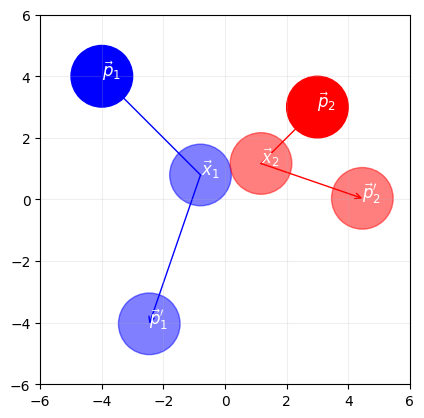

In [3]:
if b**2 - 4 * a * c >= 0:
    m = 1

    # Center of mass on the line of impact
    n = x2 - x1
    n_mag2 = n.dot(n)

    # Impluse
    J = (2 * dv.dot(n)) / (n_mag2 * (m + m)) * n

    # New  velocities
    v1_prime = v1 + J * m
    v2_prime = v2 - J * m

    # Final poistions
    r1f = x1 + v1_prime * (tf - t)
    r2f = x2 + v2_prime * (tf - t)

    plt.plot([p1[0], x1[0]], [p1[1], x1[1]], color="blue", lw=1)
    plt.annotate(
        "",
        xytext=x1,
        xy=r1f,
        arrowprops=dict(
            arrowstyle="->", color="blue", lw=1, shrinkA=0, shrinkB=0
        ),
        zorder=0,
    )

    plt.plot([p2[0], x2[0]], [p2[1], x2[1]], color="red", lw=1)
    plt.annotate(
        "",
        xytext=x2,
        xy=r2f,
        arrowprops=dict(
            arrowstyle="->", color="red", lw=1, shrinkA=0, shrinkB=0
        ),
        zorder=0,
    )

    plt.gca().add_patch(plt.Circle(r1f, radii, color="blue", alpha=0.5))
    plt.annotate(r"$\vec{p}_1'$", r1f, color="white", fontsize=12)

    plt.gca().add_patch(plt.Circle(r2f, radii, color="red", alpha=0.5))
    plt.annotate(r"$\vec{p}_2'$", r2f, color="white", fontsize=12)

    plt.gca().add_patch(plt.Circle(x1, radii, color="blue", alpha=0.5))
    plt.annotate(r"$\vec{x}_1$", x1, color="white", fontsize=12)

    plt.gca().add_patch(plt.Circle(x2, radii, color="red", alpha=0.5))
    plt.annotate(r"$\vec{x}_2$", x2, color="white", fontsize=12)
else:
    plt.annotate(
        "",
        xytext=p1,
        xy=r1,
        arrowprops=dict(
            arrowstyle="->", color="blue", lw=1, shrinkA=0, shrinkB=0
        ),
        zorder=0,
    )
    plt.annotate(
        "",
        xytext=p2,
        xy=r2,
        arrowprops=dict(
            arrowstyle="->", color="red", lw=1, shrinkA=0, shrinkB=0
        ),
        zorder=0,
    )

plt.gca().add_patch(plt.Circle(p1, radii, color="blue"))
plt.annotate(r"$\vec{p}_1$", p1, color="white", fontsize=12)

plt.gca().add_patch(plt.Circle(p2, radii, color="red"))
plt.annotate(r"$\vec{p}_2$", p2, color="white", fontsize=12)

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.gca().set_aspect("equal")

plt.grid(alpha=0.2)
plt.show()


This process is repeated until no potential collisions are detected within a given time frame. However, maintaining accuracy with this approach leads to a time complexity of $O(N^2)$, which is not ideal for real-time simulations.

Some research papers in Molecular Dynamics (MD), particularly Event-Driven Molecular Dynamics (EDMD), propose the use of the *cell method* or *neighbor list* to reduce the number of particle-pair checks. While these methods significantly decrease the computational overhead in many cases, they may fall short in accuracy when particles move with high velocities, such that they can traverse entire spatial cells or boundaries within a single time frame. In such scenarios, relying solely on these original algorithms may result in decreased in accuracy.

By extending the original cell method to account for **particle velocity**. Instead of associating each particle with only its current position, we also consider its path within a given time frame. A particle's motin is modeled parametrically as a line segment between it's initial position and it's predicted end position. By treating this segment as a continous path, we can traverse through all spatial cells intersected by the trajectory.

This is achieved by stepping along the line in axis-aligned intervals defined by the grid cell size, ensuring that all intersected cells are visited. Each visited cell is then associated with the particle’s ID, allowing for efficient, velocity-aware collision detection without the need to check all $N^2$ pairs.

Particle:

- Let $\vec{p}_0$ be the initial position of the particle.
- Let $\vec{p}_1$ be the predicted end position of the particle.
- Let $\vec{v}_0$ be its velocity.
- Let $\Delta t$ be the time frame.

Grid, be it uniform or non-uniform:

- Let $\vec{g}_{min}$ be the origin of the grid.
- Let $\vec{s}$ be the size of each cell.

We want to compute all **grid cells** the particle's trajectory passes through during the time frame. By doing so, we convert the **world-space** position to **grid coordinates**,

$$
\vec{c} = \left \lfloor \frac{\vec{p} - \vec{g}_{min}}{\vec{s}} \right  \rfloor \in \mathbb{Z}^2
$$

By traversing the grid, we used the **Voxel Traversal Algorithm** specifically **Digital Differential Analyzer (DDA)**,

- Let $\vec{d} = \vec{p}_1 - \vec{p}_0$ be the total displacement.
- Let $\vec{s}_{step} = \text{sign} (\vec{d})$ be the direction of traversal for each axis.

For each $i \in { x, y }$:

- Let $t_{max,i}$ be the normalized time $t$ at which the particle crosses the next grid line along axis $i$.
- Let $t_{\Delta,i}$ be the normalized time between **successive grid lines** (cell boundaries) on axis $i$.

These are give by,

$$
\begin{align}
t_{max,i} & = \begin{cases}
\frac{(c_i + 1) \cdot s_i + g_i^{min} - p_{0i}}{d_i} & \text{if } d_i > 0 \\
\frac{c_i \cdot s_i + g_i^{min} - p_{0i}}{d_i} & \text{if } d_i < 0 \\
\infty & \text{if } d_i = 0
\end{cases} \\
t_{\Delta,i} & = \frac{s_i}{d_i} \quad \text{if } d_i \neq 0
\end{align}
$$

At each step, choose the axis $i$ with the smallest $t_max$,

- Step in that axis direction $s_{step,i}$.
- Increment $t_{max,i} \gets t_{max,i} + t_{\Delta,i}$
- Record the new grid cell

Repeat until we reach the end cell. However, a flaw to this is when the $\vec{p}_1$ is not within the boundaries of the grid. What we could do is before staring the entire process of getting the grid cells, we could just simply clip the position $\vec{p}_1$ to the grid boundaries.

$$
\vec{p}_{clip}(t) = \vec{p}_0 + t \cdot \vec{d}, \quad t \in [t_{min}, t_{max}]
$$

Where $t_{min}$, $t_{max}$ are computed from the box intersection constraint,

$$
t_i = \frac{g_i^{min} - p_{0i}}{d_i}, \quad \frac{g_i^{max} - p_{0i}}{d_i}
$$

$$
t_{\Delta,i} = \frac{s_i}{|d_i|}, \quad \text{if } d_i \neq 0
$$

Take the maximum of all entering $t$ values and the minimum of exiting ones.

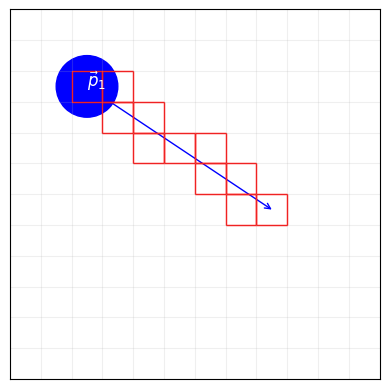

In [4]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np


class Particle:
    def __init__(
        self, position: np.ndarray, velocity: np.ndarray, radius=1.0, mass=1.0
    ):
        self.position = position
        self.velocity = velocity
        self.radius = radius
        self.mass = mass

    def set_color(self, color: str):
        self.color = color

    def radius_velocity(self, t: float) -> np.ndarray:
        return self.position + self.velocity * t

    def world_to_grid(self, cell_size: np.ndarray, boundary: np.ndarray):
        return np.floor((self.position - boundary) / cell_size).astype(
            np.int64
        )

    def clipped_position(
        self, boundary: tuple[np.ndarray], t: float
    ) -> tuple[np.ndarray]:
        dir = self.radius_velocity(t) - self.position
        t_min, t_max = 0.0, 1.0

        boundary_min = boundary[0]
        boundary_max = boundary[1]

        for i in range(2):
            if dir[i] != 0:
                t1 = (boundary_min[i] - self.position[i]) / dir[i]
                t2 = (boundary_max[i] - self.position[i]) / dir[i]
                t_enter = min(t1, t2)
                t_exit = max(t1, t2)

                t_min = max(t_min, t_enter)
                t_max = min(t_max, t_exit)
            elif not (boundary_min[i] <= self.position[i] <= boundary_max[i]):
                return None, None

        if t_min > t_max:
            return None, None

        clipped_start = self.position + dir * t_min
        clipped_end = self.position + dir * t_max
        return clipped_start, clipped_end

    def get_cells_along_direction(
        self, cell_size: np.ndarray, boundary: tuple[np.ndarray], t: float
    ) -> list[tuple[np.int64]]:
        cells = []

        boundary_min = boundary[0]

        start, end = self.clipped_position(boundary, t)

        delta = end - start

        step = np.sign(delta).astype(np.int64)

        start_cell = np.floor((start - boundary_min) / cell_size).astype(np.int64)
        end_cell = np.floor((end - boundary_min) / cell_size).astype(np.int64)

        t_max = np.zeros(2)
        t_delta = np.zeros(2)

        for i in range(2):
            if delta[i] != 0:
                next_boundary = (start_cell[i] + (step[i] > 0)) * cell_size[
                    i
                ] + boundary_min[i]
                t_max[i] = (next_boundary - start[i]) / delta[i]
                t_delta[i] = cell_size[i] / abs(delta[i])
            else:
                t_max[i] = np.inf
                t_delta[i] = np.inf

        curr = start_cell.copy()

        while not np.array_equal(curr, end_cell):
            cells.append(tuple(curr))
            axis = 0 if t_max[0] < t_max[1] else 1
            curr[axis] += np.int64(step[axis])
            t_max[axis] += t_delta[axis]

            if all(
                (step[i] > 0 and curr[i] > end_cell[i])
                or (step[i] < 0 and curr[i] < end_cell[i])
                or (step[i] == 0 and curr[i] == end_cell[i])
                for i in range(2)
            ):
                break

        cells.append(tuple(end_cell))

        return cells

    def get_circle_cells(
        self, cell_size: np.ndarray, boundary: tuple[np.ndarray]
    ) -> list[tuple[np.int64]]:
        cells = []
        min_bound = boundary[0]
        grid_shape = ((boundary[1] - boundary[0]) / cell_size).astype(np.int64)

        circle_min = self.position - self.radius
        circle_max = self.position + self.radius

        cell_min = np.floor((circle_min - min_bound) / cell_size).astype(np.int64)
        cell_max = np.floor((circle_max - min_bound) / cell_size).astype(np.int64)

        cell_min = np.clip(cell_min, [0, 0], grid_shape - 1)
        cell_max = np.clip(cell_max, [0, 0], grid_shape - 1)

        for i in range(cell_min[0], cell_max[0] + 1):
            for j in range(cell_min[1], cell_max[1] + 1):
                cells.append((i, j))

        return cells

    def plt_add(self, **kwargs):
        kwargs = {"color": self.color, **kwargs}

        plt.gca().add_patch(plt.Circle(self.position, self.radius, **kwargs))

    def plt_annotate(self, text: str, **kwargs):
        kwargs = {"color": "white", "fontsize": 12, **kwargs}

        plt.annotate(text, self.position, **kwargs)

    def plt_velocity(self, t: float, **kwargs):
        kwargs = {
            "arrowprops": dict(
                arrowstyle="->",
                color=kwargs.pop("color", self.color),
                lw=1,
                shrinkA=0,
                shrinkB=0,
            ),
            "zorder": 0,
            **kwargs,
        }

        plt.annotate(
            "", xytext=self.position, xy=self.radius_velocity(t), **kwargs
        )

    def plt_collision_point(self, position: np.ndarray, **kwargs):
        kwargs = {"color": self.color, "alpha": 0.5, **kwargs}

        plt.gca().add_patch(plt.Circle(position, self.radius, **kwargs))

    def plt_velocity_from_position(
        self, position: np.ndarray, t: float, **kwargs
    ):
        kwargs = {
            "arrowprops": dict(
                arrowstyle="->",
                color=kwargs.pop("color", self.color),
                lw=1,
                shrinkA=0,
                shrinkB=0,
            ),
            "zorder": 0,
            **kwargs,
        }

        plt.annotate(
            "", xytext=position, xy=position + self.velocity * t, **kwargs
        )


t = 1
g = (np.array([-6, -6]), np.array([6, 6]))
s = np.array([1.0, 1.0])

p = Particle(np.array([-3.5, 3.5]), np.array([6.0, -4.0]))

p.set_color("blue")

p.plt_add()
p.plt_velocity(t)
p.plt_annotate(r"$\vec{p}_1$")

for cell in p.get_cells_along_direction(s, g, t):
    plt.gca().add_patch(
        patches.Rectangle(
            g[0] + cell * s, *s, facecolor="none", edgecolor="red"
        )
    )

plt.xticks(np.arange(g[0][0], g[1][0] + 1, s[0]))
plt.yticks(np.arange(g[0][1], g[1][1] + 1, s[1]))
plt.gca().set_aspect("equal")
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.gca().tick_params(axis="x", which="both", bottom=False, top=False)
plt.gca().tick_params(axis="y", which="both", left=False, right=False)

plt.grid(alpha=0.2)
plt.show()

## Suggested Idea

$$
\vec{F} = m\vec{a}
$$